Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings
filterwarnings(action='ignore')

Dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\agnih\Desktop\ML\Advertising.csv')
# dataset.describe(include="all")
type(dataset)

pandas.core.frame.DataFrame

In [3]:
dataset.isnull().sum() #No null values found

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<AxesSubplot: >

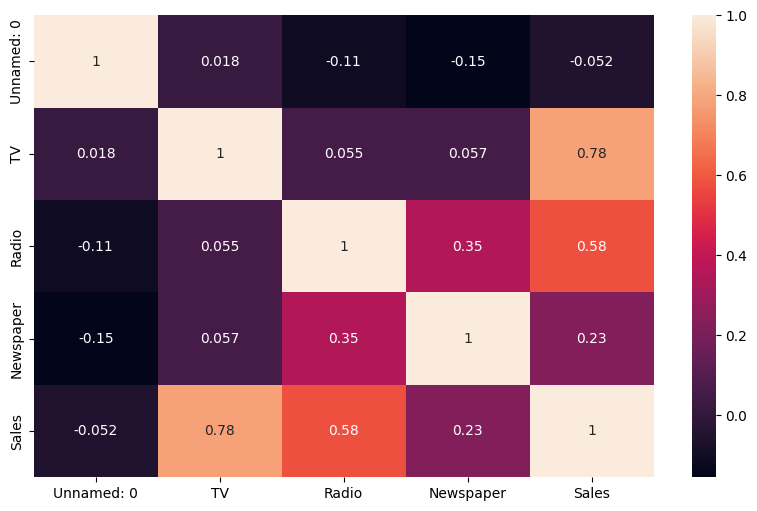

In [4]:
#Understanding the Correlation between the Variables
corr = dataset.corr(numeric_only = True)
plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True)

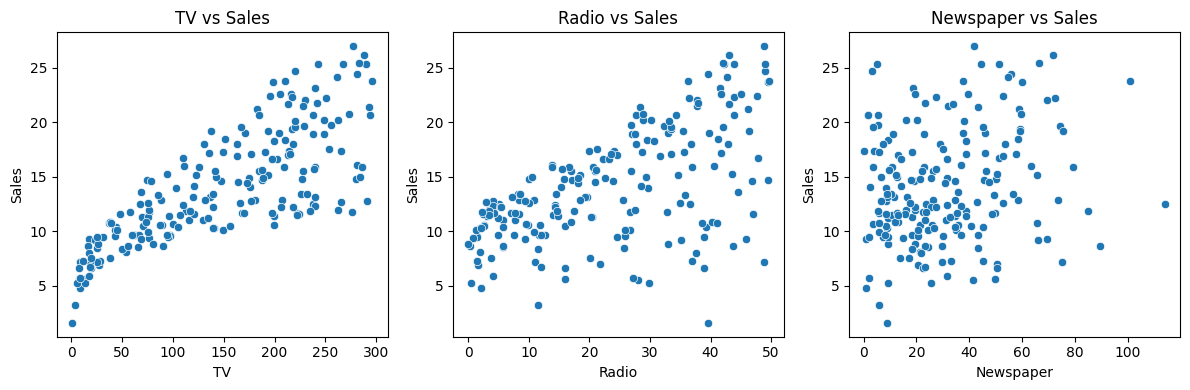

In [5]:
#Plotting graphs among the variables for better understanding
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.scatterplot(data=dataset, x='TV', y='Sales', ax=axes[0])
axes[0].set_title('TV vs Sales')
sns.scatterplot(data=dataset, x='Radio', y='Sales', ax=axes[1])
axes[1].set_title('Radio vs Sales')
sns.scatterplot(data=dataset, x='Newspaper', y='Sales', ax=axes[2])
axes[2].set_title('Newspaper vs Sales')
plt.tight_layout()
plt.show()

In [6]:
#Dividing them into train and test datasets
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

Model Training

In [7]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8928781912093182


In [8]:
#Support Vector machine  Regression
from sklearn.svm import SVR
from sklearn.svm import SVR
support_regression = SVR(kernel='rbf')
support_regression.fit(X_train,y_train)
y_pred_svr = support_regression.predict(X_test)
print(r2_score(y_test,y_pred_svr))

0.6738699762776597


In [9]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=0)
DTR.fit(X_train,y_train)
y_DTR = DTR.predict(X_test)
print(r2_score(y_test,y_DTR))

0.9587330674850961


In [10]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=15,random_state=1)
RFR.fit(X_train,y_train)
y_RFR = RFR.predict(X_test)
print(r2_score(y_test,y_RFR))

0.969412520111255
